In [1]:
import numpy as np
import pandas as pd

## Load Dataset

In [21]:
train = pd.read_csv("data/train.csv")

print(train.shape)
train.head()

(100, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


### Load Image

In [22]:
from scipy.ndimage import imread

def load_images(filenames):
    images = []

    for filename in filenames:
        image = imread(filename)
        images.append(image)

    images = np.array(images)

    return images

In [23]:
filenames = "data/train/" + train["filename"]

X_train = load_images(filenames)
X_train.shape

(100,)

In [24]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(100,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

### Visualize

[0 0 1 1 1 1 0 0 1 0]


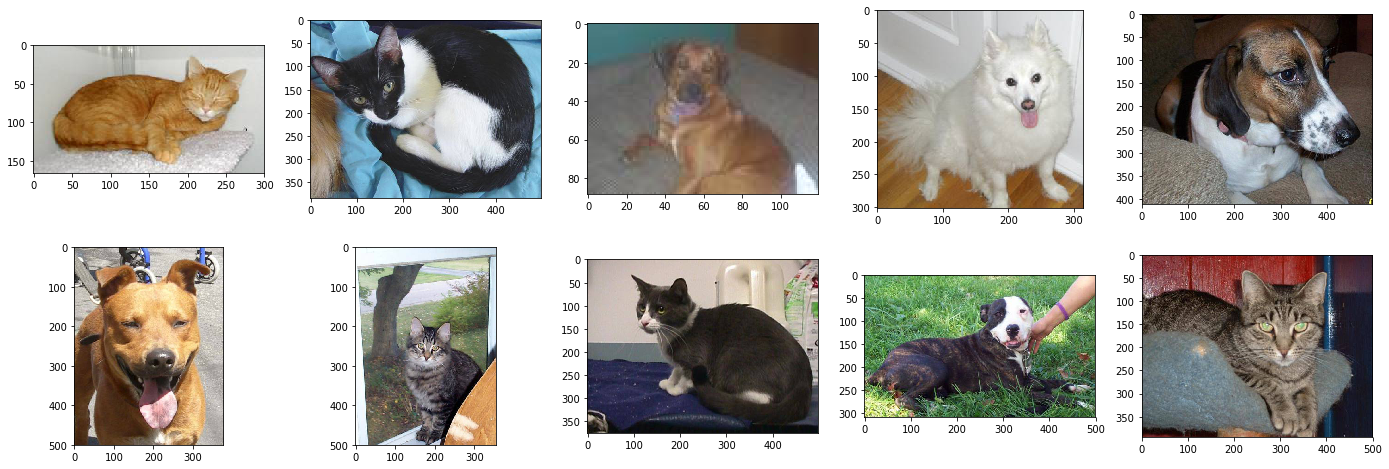

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 8)

print(y_train[0:10])

axes[0][0].imshow(X_train[0])
axes[0][1].imshow(X_train[1])
axes[0][2].imshow(X_train[2])
axes[0][3].imshow(X_train[3])
axes[0][4].imshow(X_train[4])
axes[1][0].imshow(X_train[5])
axes[1][1].imshow(X_train[6])
axes[1][2].imshow(X_train[7])
axes[1][3].imshow(X_train[8])
axes[1][4].imshow(X_train[9])

## Preprocessing

### Resize

In [26]:
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in original_images:
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

In [27]:
resized_images = resize_image(X_train, size=(224, 224))
resized_images.shape

(100, 224, 224, 3)

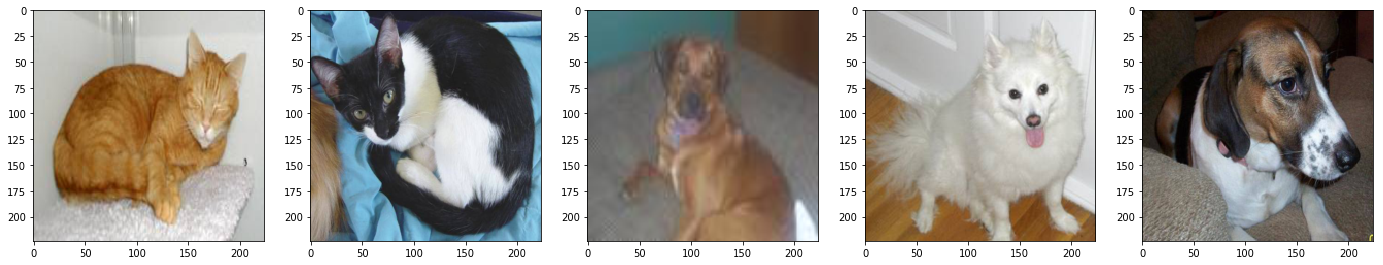

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(24, 8)

axes[0].imshow(resized_images[0])
axes[1].imshow(resized_images[1])
axes[2].imshow(resized_images[2])
axes[3].imshow(resized_images[3])
axes[4].imshow(resized_images[4])

### Crop

In [29]:
def random_crop(image, original_width, original_height, crop_width, crop_height):
    width_shift = np.random.randint(original_width - crop_width - 1)
    height_shift = np.random.randint(original_height - crop_height - 1)

    width_start = width_shift
    width_finish = crop_width + width_shift

    height_start = height_shift
    height_finish = crop_height + height_shift
    
    return image[width_start:width_finish, height_start:height_finish, :]

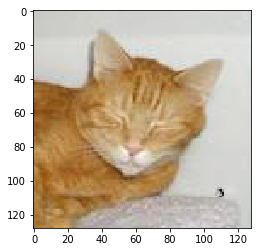

In [30]:
image = X_train[0]

cropped_image = random_crop(image, 166, 300, 128, 128)
plt.imshow(cropped_image)

In [31]:
def crop_images(images, labels, duplicate, size):
    cropped_images = []
    cropped_labels = []
    
    for image, label in zip(images, labels):
        for _ in range(duplicate):
            cropped_image = random_crop(image, *size)
            
            cropped_images.append(cropped_image)
            cropped_labels.append(label)
    
    cropped_images = np.array(cropped_images)
    cropped_labels = np.array(cropped_labels)
    
    return cropped_images, cropped_labels

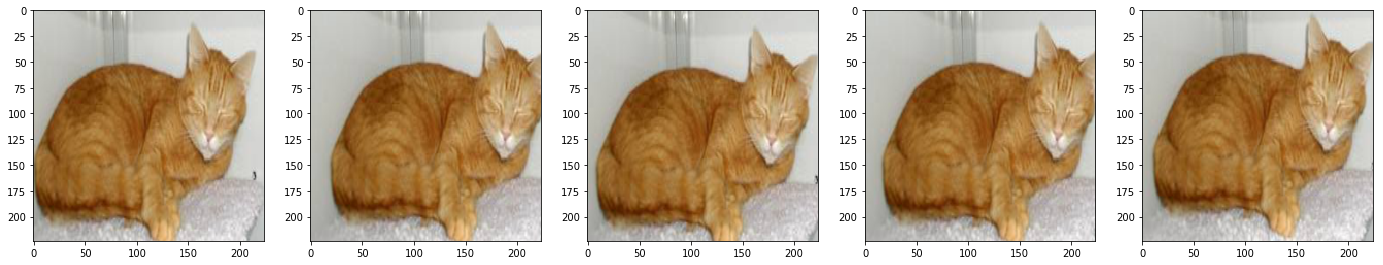

In [32]:
resized_images = resize_image(X_train, size=(256, 256))

cropped_images, cropped_labels = crop_images(resized_images, y_train, 5, (256, 256, 224, 224))

figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(24, 8)

axes[0].imshow(cropped_images[0])
axes[1].imshow(cropped_images[1])
axes[2].imshow(cropped_images[2])
axes[3].imshow(cropped_images[3])
axes[4].imshow(cropped_images[4])

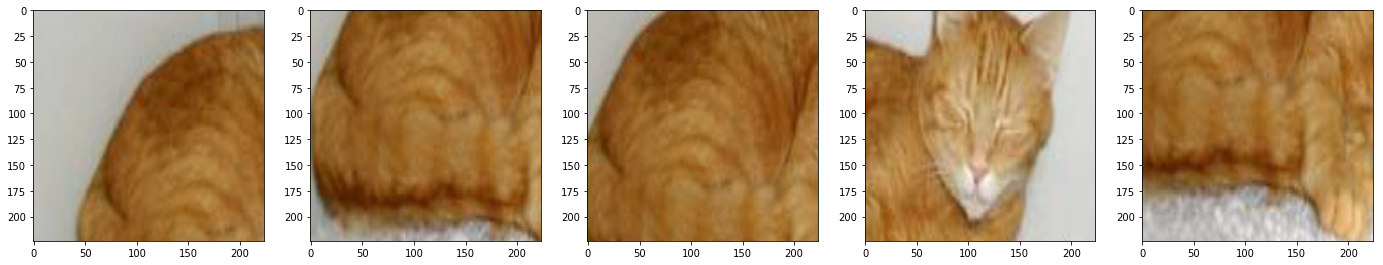

In [33]:
resized_images = resize_image(X_train, size=(512, 512))

cropped_images, cropped_labels = crop_images(resized_images, y_train, 5, (512, 512, 224, 224))

figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(24, 8)

axes[0].imshow(cropped_images[0])
axes[1].imshow(cropped_images[1])
axes[2].imshow(cropped_images[2])
axes[3].imshow(cropped_images[3])
axes[4].imshow(cropped_images[4])

## Flip

In [34]:
from scipy.misc import imresize

def flip_images(original_images, labels):
    flipped_images = []
    flipped_labels = []

    for original_image, label in zip(original_images, labels):
        flipped_image = np.fliplr(original_image)

        flipped_images.append(original_image)
        flipped_images.append(flipped_image)
        
        flipped_labels.append(label)
        flipped_labels.append(label)
        
    flipped_images = np.array(flipped_images)
    flipped_labels = np.array(flipped_labels)
    
    return flipped_images, flipped_labels

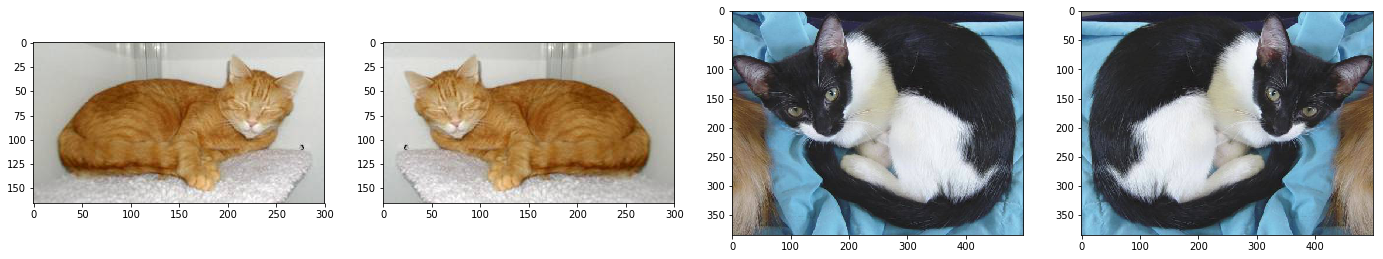

In [35]:
flipped_images, flipped_labels = flip_images(X_train, y_train)

figure, axes = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(24, 8)

axes[0].imshow(flipped_images[0])
axes[1].imshow(flipped_images[1])
axes[2].imshow(flipped_images[2])
axes[3].imshow(flipped_images[3])